<a href="https://colab.research.google.com/github/hafluz/tsunami_exploratory/blob/main/Project_2_Tsunami_Exploratory_Data_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis of Tsunami events

### Objectives:


*   Understand the data
*   Clean the data
*   Explore the data
*   Identify correlation between variables
*   Visualize geo positioning of events
*   Query the data and extract insights

## **Data Setup and Loading**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('max_column', 200)

!pip install --upgrade geopandas
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
from google.colab import auth
from google.cloud import bigquery

project_id = "sixth-zoo-371021"
client = bigquery.Client(project=project_id)
auth.authenticate_user()
print('Authenticated')

Authenticated


In [125]:
# df = pd.read_csv()

In [126]:
df = client.query('''
SELECT *
FROM `bigquery-public-data.noaa_tsunami.historical_source_event`
''' ).to_dataframe()

df.head()

,id,year,month,day,timestamp,event_validity,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,deaths,deaths_description,missing,missing_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_destroyed,houses_destroyed_description,houses_damaged,houses_damaged_description,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,3190,1774,9,24,1774-09-24 00:00:00,1,0,<NA>,NaN,None,None,MEDITERRANEAN SEA,NaN,NaN,50,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,3650,<NA>,<NA>,<NA>,None,<NA>,<NA>,<NA>,NaN,None,None,None,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,97,1099,11,11,1099-11-11 00:00:00,1,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,187,1580,4,6,1580-04-06 00:00:00,0,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,224,1609,1,19,1609-01-19 00:00:00,1,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>



## **Data Understanding**

In [127]:
df.shape

(2800, 44)

In [128]:
df.head()

,id,year,month,day,timestamp,event_validity,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,deaths,deaths_description,missing,missing_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_destroyed,houses_destroyed_description,houses_damaged,houses_damaged_description,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,3190,1774,9,24,1774-09-24 00:00:00,1,0,<NA>,NaN,None,None,MEDITERRANEAN SEA,NaN,NaN,50,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,3650,<NA>,<NA>,<NA>,None,<NA>,<NA>,<NA>,NaN,None,None,None,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,97,1099,11,11,1099-11-11 00:00:00,1,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,187,1580,4,6,1580-04-06 00:00:00,0,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,224,1609,1,19,1609-01-19 00:00:00,1,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


In [129]:
df.columns

Index(['id', 'year', 'month', 'day', 'timestamp', 'event_validity',
       'cause_code', 'focal_depth', 'primary_magnitude', 'country', 'state',
       'location_name', 'latitude', 'longitude', 'region_code',
       'maximum_water_height', 'abe', 'iida', 'soloviev', 'warning_status',
       'deaths', 'deaths_description', 'missing', 'missing_description',
       'injuries', 'injuries_description', 'damage_millions_dollars',
       'damage_description', 'houses_destroyed',
       'houses_destroyed_description', 'houses_damaged',
       'houses_damaged_description', 'total_deaths',
       'total_deaths_description', 'total_missing',
       'total_missing_description', 'total_injuries',
       'total_injuries_description', 'total_damage_in_millions_dollars',
       'total_damage_description', 'total_houses_destroyed',
       'total_houses_destroyed_description', 'total_houses_damaged',
       'total_houses_damaged_description'],
      dtype='object')

In [130]:
df.dtypes

id                                      Int64
year                                    Int64
month                                   Int64
day                                     Int64
timestamp                              object
event_validity                          Int64
cause_code                              Int64
focal_depth                             Int64
primary_magnitude                     float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                             float64
region_code                             Int64
maximum_water_height                  float64
abe                                   float64
iida                                  float64
soloviev                              float64
warning_status                          Int64
deaths                                  Int64
deaths_description                

In [131]:
df.describe()

,id,year,month,day,event_validity,cause_code,focal_depth,primary_magnitude,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,deaths,deaths_description,missing,missing_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_destroyed,houses_destroyed_description,houses_damaged,houses_damaged_description,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
count,2800.000000,2799.000000,2648.000000,2540.000000,2799.000000,2795.000000,962.000000,1588.000000,2423.000000,2422.000000,2798.000000,1202.000000,1.0,749.000000,1262.000000,57.000000,259.000000,352.000000,73.000000,85.000000,4.000000,5.000000,46.000000,611.000000,100.000000,275.000000,15.000000,59.000000,596.000000,739.000000,10.000000,11.000000,283.000000,328.000000,143.000000,1154.000000,2.330000e+02,649.000000,73.000000,223.000000
mean,2368.111786,1814.513755,6.601208,15.648425,2.385138,1.860465,35.785863,7.015491,17.371054,39.243251,74.891708,6.173502,8.1,0.741896,1.432298,2.666667,3532.884170,2.167614,1481.643836,1.882353,194.250000,1.600000,5779.249543,1.762684,3909.830000,2.250909,21855.000000,1.796610,4357.020134,2.166441,4549.000000,2.000000,4845.151943,2.246951,4196.658804,2.149913,3.451393e+04,2.625578,29246.082192,2.237668
std,1721.453065,344.286532,3.471013,8.676657,1.542213,2.337915,40.402191,0.806018,27.811276,104.138907,14.696114,26.374304,NaN,2.083467,1.815602,1.340753,23847.911136,1.187675,4859.678228,1.084652,316.152258,0.894427,32628.129551,0.977274,14167.463975,1.086895,72361.636925,1.063171,22048.175837,1.211132,13680.654313,1.183216,29971.128277,1.140037,21697.278669,1.062270,3.543130e+05,1.039361,76861.182359,1.131856
min,1.000000,-2000.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,3.200000,-63.000000,-179.971000,30.000000,0.010000,8.1,-4.640000,-4.140000,-1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.003000,1.000000,1.000000e+00,1.000000,2.000000,1.000000
25%,1004.750000,1823.000000,3.000000,8.000000,1.000000,1.000000,16.000000,6.500000,-4.734000,-70.100000,60.000000,0.270000,8.1,-0.700000,0.500000,2.000000,4.000000,1.000000,3.000000,1.000000,25.000000,1.000000,1.200000,1.000000,20.000000,1.000000,10.000000,1.000000,5.000000,1.000000,15.000000,1.000000,16.500000,1.000000,2.412500,1.000000,4.000000e+01,2.000000,127.000000,1.000000
50%,1924.500000,1899.000000,7.000000,16.000000,3.000000,1.000000,30.000000,7.000000,24.470000,29.200000,82.000000,1.015000,8.1,1.000000,1.500000,3.000000,40.000000,2.000000,20.000000,1.000000,50.000000,1.000000,4.600000,1.000000,232.000000,2.000000,238.000000,1.000000,43.000000,2.000000,84.000000,1.000000,100.000000,2.000000,39.000000,2.000000,5.880000e+02,3.000000,900.000000,2.000000
75%,3445.250000,1962.500000,10.000000,23.000000,4.000000,1.000000,39.000000,7.500000,38.750000,136.875000,85.000000,4.000000,8.1,2.000000,3.000000,4.000000,714.000000,3.000000,233.000000,3.000000,219.250000,2.000000,95.000000,2.000000,1970.000000,3.000000,1672.000000,3.000000,809.250000,3.000000,582.500000,3.000000,500.000000,3.000000,520.000000,3.000000,3.000000e+03,3.000000,10044.000000,3.000000
max,5808.000000,2021.000000,12.000000,31.000000,4.000000,11.000000,600.000000,9.500000,71.813000,179.984000,89.000000,524.600000,8.1,8.400000,9.000000,4.000000,300000.000000,4.000000,31943.000000,4.000000,667.000000,3.000000,220085.456000,4.000000,123661.000000,4.000000,280920.000000,4.000000,316000.000000,4.000000,43476.000000,4.000000,374171.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,500000.000000,4.000000


## **Data Wrangling**

In [132]:
# Dropping unnecessary columns

df = df[['id', 'year', 
        #  'month', 'day', 'timestamp', 'event_validity',
       'cause_code', 'focal_depth', 'primary_magnitude', 'country', 'state',
       'location_name', 'latitude', 'longitude', 'region_code',
       'maximum_water_height', 'abe', 'iida', 'soloviev', 'warning_status',
      #  'deaths', 'deaths_description', 'missing', 'missing_description',
      #  'injuries', 'injuries_description', 'damage_millions_dollars',
      #  'damage_description', 'houses_destroyed',
      #  'houses_destroyed_description', 'houses_damaged',
      #  'houses_damaged_description',
        'total_deaths',
       'total_deaths_description', 'total_missing',
       'total_missing_description', 'total_injuries',
       'total_injuries_description', 'total_damage_in_millions_dollars',
       'total_damage_description', 'total_houses_destroyed',
       'total_houses_destroyed_description', 'total_houses_damaged',
       'total_houses_damaged_description']].copy()

In [133]:
# df.drop(['month', 'day', 'timestamp', 'event_validity'], axis=1)

In [134]:
df.shape

(2800, 28)

In [135]:
df.dtypes

id                                      Int64
year                                    Int64
cause_code                              Int64
focal_depth                             Int64
primary_magnitude                     float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                             float64
region_code                             Int64
maximum_water_height                  float64
abe                                   float64
iida                                  float64
soloviev                              float64
warning_status                          Int64
total_deaths                            Int64
total_deaths_description                Int64
total_missing                           Int64
total_missing_description               Int64
total_injuries                          Int64
total_injuries_description        

In [136]:
# Finding number of unique countries

n = len(pd.unique(df['country']))
print("Number of Unique Countries:", n)

Number of Unique Countries: 114


In [137]:
# Changing 'year' column type

pd.to_numeric(df['year'])

0       1774
1       <NA>
2       1099
3       1580
4       1609
        ... 
2795    1993
2796    2020
2797    2013
2798    1994
2799    1843
Name: year, Length: 2800, dtype: Int64

In [138]:
# Renaming column 'ID'

df = df.rename(columns={'id':'tsunami_id'})

### Missing Values

In [139]:
# Checking for Missing Values

df.isna().sum()

tsunami_id                               0
year                                     1
cause_code                               5
focal_depth                           1838
primary_magnitude                     1212
country                                  2
state                                 2488
location_name                            4
latitude                               377
longitude                              378
region_code                              2
maximum_water_height                  1598
abe                                   2799
iida                                  2051
soloviev                              1538
warning_status                        2743
total_deaths                          2204
total_deaths_description              2061
total_missing                         2790
total_missing_description             2789
total_injuries                        2517
total_injuries_description            2472
total_damage_in_millions_dollars      2657
total_damag

In [140]:
# Drop rows with missing Cause Codes

df = df[~df['cause_code'].isnull()]

In [141]:
# Drop rows with missing locations

df = df.dropna(subset=['latitude', 'longitude'])

In [142]:
df.head()

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
2,97,1099,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,187,1580,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,224,1609,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
5,457,1755,0,<NA>,NaN,UK,None,"RIVER TEES, ENGLAND",54.680,-1.210,73,0.9,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
6,460,1756,0,<NA>,NaN,UK,None,"ILFRACOMBE, ENGLAND",51.208,-4.122,73,1.8,NaN,0.8,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


### Duplicates

In [143]:
# Checking for duplicates

print(df.duplicated().sum())

1


In [144]:
# Locating duplicates

df.loc[df.duplicated()]

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
1733,1926,1961,1,15,6.5,CHILE,None,CENTRAL CHILE,-36.7,-73.0,89,NaN,NaN,NaN,NaN,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,NaN,1,<NA>,<NA>,<NA>,<NA>


In [145]:
# Drop duplicates

df.drop_duplicates(subset='tsunami_id', keep='first', inplace=True)

In [146]:
df.loc[df.duplicated(subset=['tsunami_id'])]

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description


### Imputing missing values

In [147]:
# Finding the value counts for the column 'Cause_code'

df['cause_code'].isna().sum()

0

In [148]:
# Identifying the value that is most frequent in the 'Cause_code' column

df['cause_code'].value_counts()

1     1843
0      171
6      119
3      110
8       90
9       36
4       18
2       18
7       12
10       1
5        1
Name: cause_code, dtype: Int64

In [149]:
# Imputing all  empty rows in the 'Cause_code' column  with the most frequent value identified

df['cause_code'].fillna('1', inplace=True)

In [150]:
# Verifying if imputing was successful

df['cause_code'].isna().sum()

0

In [151]:
# Creating new column with Tsunami Cause Names

df['tsunami_cause'] = np.where(df['cause_code'] == 1, 'Earthquake',
                      np.where(df['cause_code'] == 2, 'Questionable Earthquake',
                      np.where(df['cause_code'] == 3, 'Earthquake and Landslide', 
                      np.where(df['cause_code'] == 4, 'Volcano and Earthquake',
                      np.where(df['cause_code'] == 5, 'Volcano, Earthquake, and Landslide',
                      np.where(df['cause_code'] == 6, 'Volcano', 
                      np.where(df['cause_code'] == 7, 'Volcano and Landslide',
                      np.where(df['cause_code'] == 8, 'Landslide',
                      np.where(df['cause_code'] == 9, 'Meteorological',   
                      np.where(df['cause_code'] == 10, 'Explosion',     
                      np.where(df['cause_code'] == 11, 'Astronomical Tide',                                 
                                  'Unknown')))))))))))

In [152]:
# Verifying if new column creation was successful

df['tsunami_cause'].value_counts()

Earthquake                            1843
Unknown                                171
Volcano                                119
Earthquake and Landslide               110
Landslide                               90
Meteorological                          36
Volcano and Earthquake                  18
Questionable Earthquake                 18
Volcano and Landslide                   12
Explosion                                1
Volcano, Earthquake, and Landslide       1
Name: tsunami_cause, dtype: int64

In [153]:
# Identifying most frequent cause if Tsunamis

majority = df['tsunami_cause'].value_counts().idxmax()
print(majority)

Earthquake


### Outliers

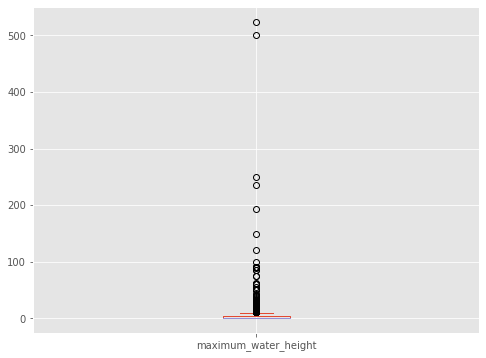

In [154]:
# Finding outliers in column 'maximum_water_height' using a box plot

df['maximum_water_height'].plot(kind='box', figsize=(8,6))

In [155]:
# Finding out the Inter Quartile Range for the column 'maximum_water_height'

df['maximum_water_height'].dropna(axis=0,inplace=True) 
Q1,Q3=df['maximum_water_height'].quantile(.25),df['maximum_water_height'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for maximum_water_height:', IQR)

The Inter Quartile Range for maximum_water_height: 3.75


In [156]:
# Finding out the upper and lower bounds

upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 9.625
Lower Bound: -5.375


In [157]:
# Identifying how many outliers are there in the column 'maximum_water_height'

(df['maximum_water_height']<lower) | (df['maximum_water_height']>upper)

2       False
3       False
4       False
5       False
6       False
        ...  
2795    False
2796    False
2797     True
2798    False
2799    False
Name: maximum_water_height, Length: 2419, dtype: bool

In [158]:
# Creating new dataframe by removing the outliers

df_clip = df['maximum_water_height'].clip(upper, lower)
df_clip.describe()

count    1142.000000
mean        2.702439
std         3.280201
min         0.010000
25%         0.250000
50%         1.000000
75%         4.000000
max         9.625000
Name: maximum_water_height, dtype: float64

##**Data Exploration**

In [159]:
df['year'].value_counts()

1928    23
1938    22
1994    21
1878    19
2017    19
        ..
358      1
362      1
1546     1
1611     1
1645     1
Name: year, Length: 526, dtype: Int64

Text(0, 0.5, 'Year')

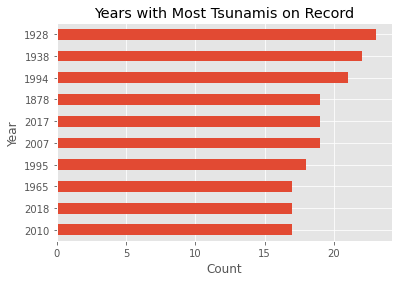

In [160]:
# Plotting the Years with Most Tsunamis on Record

ax = df['year'].value_counts() \
    .head(10) \
    .plot(kind='barh', title ='Years with Most Tsunamis on Record')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Year')

Text(0, 0.5, 'Country')

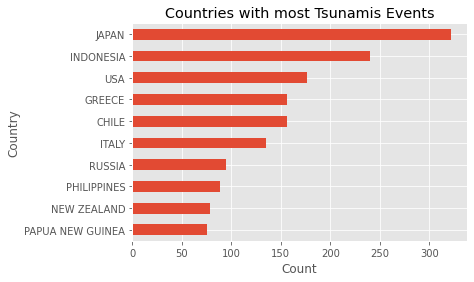

In [161]:
# Plotting the Countries with Most Tsunamis Events

ax = df['country'].value_counts().head(10) \
    .plot(kind='barh', title ='Countries with most Tsunamis Events')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Country')

Text(0, 0.5, 'Tsunami Cause')

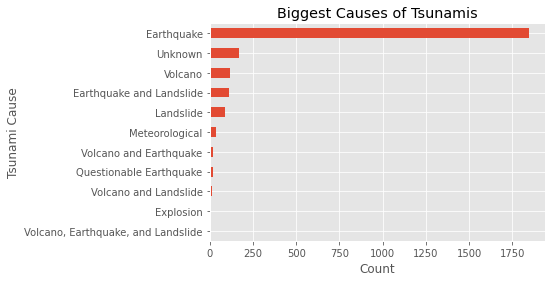

In [162]:
# Plotting the Biggest Causes of Tsunamis

ax = df['tsunami_cause'].value_counts().sort_values(ascending=False) \
    .plot(kind = 'barh', title= 'Biggest Causes of Tsunamis')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Tsunami Cause')

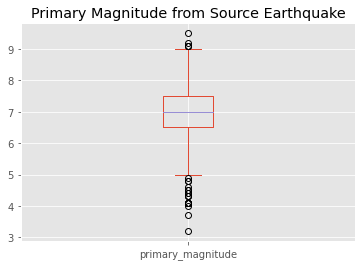

In [163]:
# Boxplot of Primary Magnitude from Source Earthquake

df['primary_magnitude'].plot(kind='box', title='Primary Magnitude from Source Earthquake')

Text(0.5, 0, 'Magnitude')

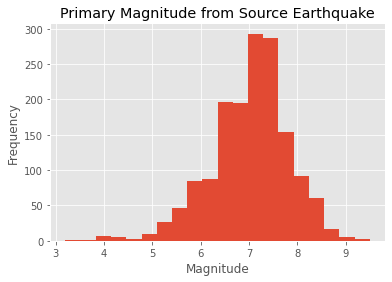

In [164]:
# Histogram of Primary Magnitude from Source Earthquake

ax = df['primary_magnitude'].plot(kind='hist', bins=20, title='Primary Magnitude from Source Earthquake')
ax.set_xlabel('Magnitude')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Magnitude')

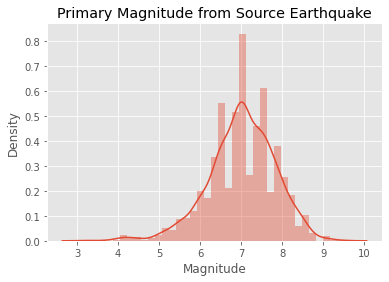

In [165]:
# Distribution of Primary Magnitude from Source Earthquake

ax = sns.distplot(df['primary_magnitude'], kde = True)

ax.set_title('Primary Magnitude from Source Earthquake')
ax.set_xlabel('Magnitude')


Text(0.5, 0, 'Depth (Km)')

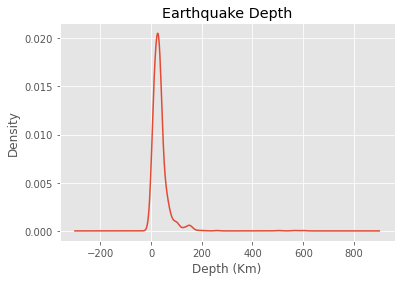

In [166]:
# Distribution of Earthquake Depth

ax = df['focal_depth'].plot(kind='kde', title='Earthquake Depth')
ax.set_xlabel('Depth (Km)')

In [167]:
# Finding the median for Earthquake Depth

df_quake=df[df['tsunami_cause']=='Earthquake']
df_quake['focal_depth'].median()

# df['focal_depth'].median()

31.0

##**Data Correlation**

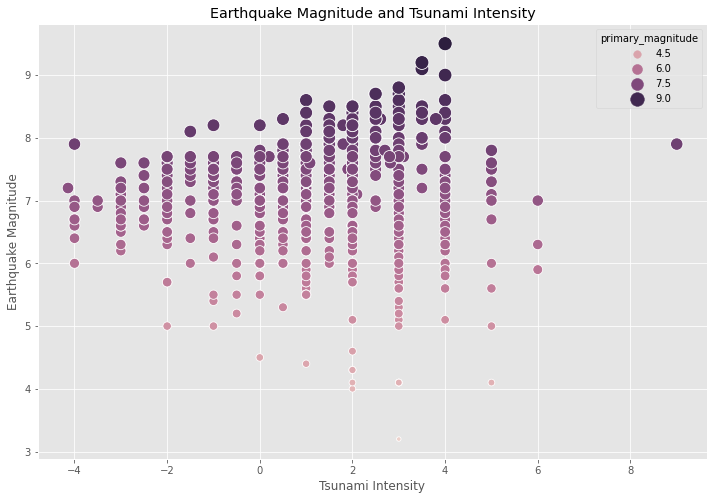

In [168]:
# Scatterplot between Earthquake Magnitude and Tsunami Intensity

fig = plt.gcf()
fig.set_size_inches(12,8)

sns.scatterplot(x='soloviev',
                y='primary_magnitude',
                hue="primary_magnitude", size="primary_magnitude",
                sizes=(20, 200),
                data=df)

plt.title('Earthquake Magnitude and Tsunami Intensity')
plt.xlabel('Tsunami Intensity')
plt.ylabel('Earthquake Magnitude')
plt.show()

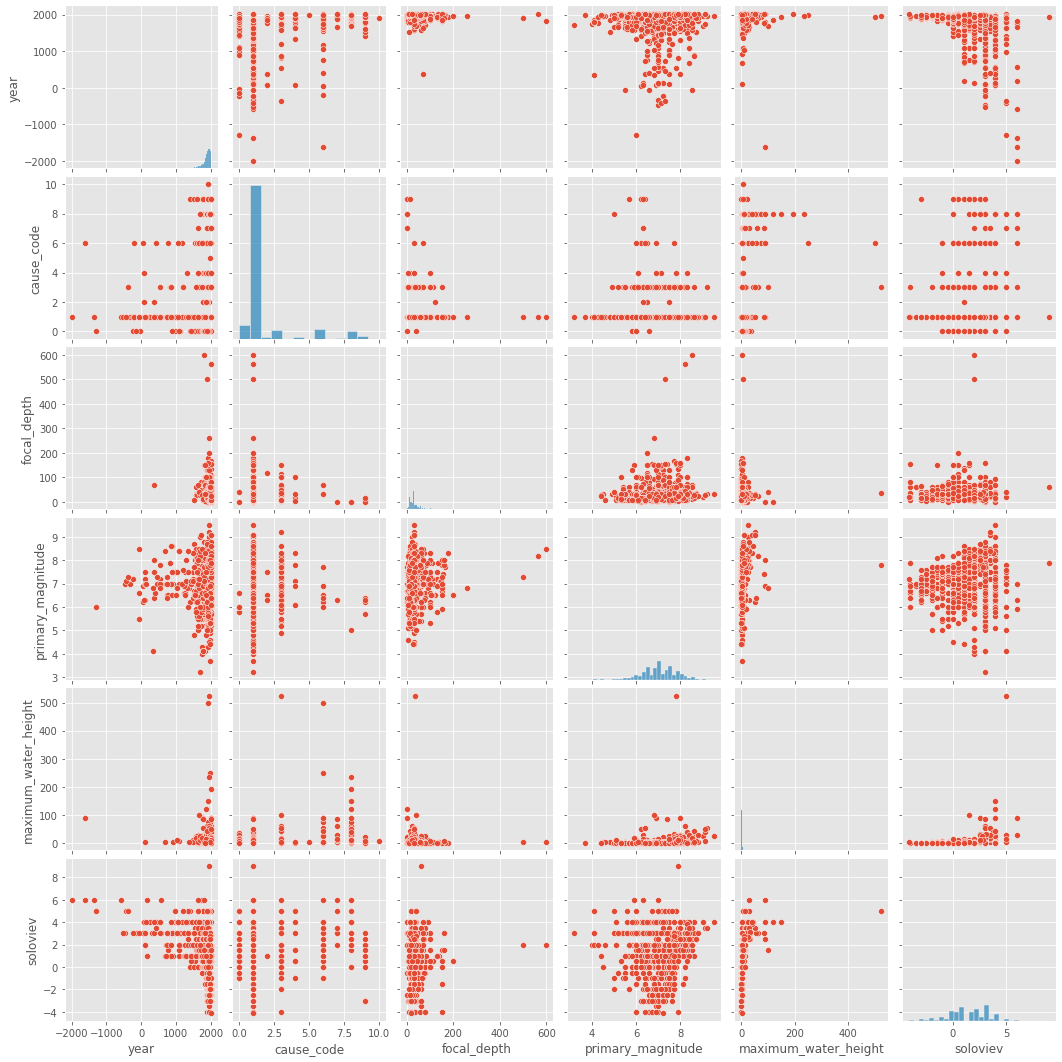

In [169]:
# Pairplot for relationship between Variables

sns.pairplot(df, 
             vars=['year','cause_code', 'focal_depth', \
                    'primary_magnitude','maximum_water_height','soloviev'])
              #hue='')
plt.show()

In [170]:
# Measuring Correlation between Variables

df_corr = df[['year','cause_code', 'focal_depth', \
              'primary_magnitude','maximum_water_height','soloviev']].corr()
df_corr

,year,cause_code,focal_depth,primary_magnitude,maximum_water_height,soloviev
year,1.000000,0.048306,-0.138825,0.008454,-0.083492,-0.359355
cause_code,0.048306,1.000000,-0.060096,-0.078168,0.229996,0.112291
focal_depth,-0.138825,-0.060096,1.000000,0.113958,-0.007962,0.028522
primary_magnitude,0.008454,-0.078168,0.113958,1.000000,0.137714,0.090036
maximum_water_height,-0.083492,0.229996,-0.007962,0.137714,1.000000,0.284137
soloviev,-0.359355,0.112291,0.028522,0.090036,0.284137,1.000000


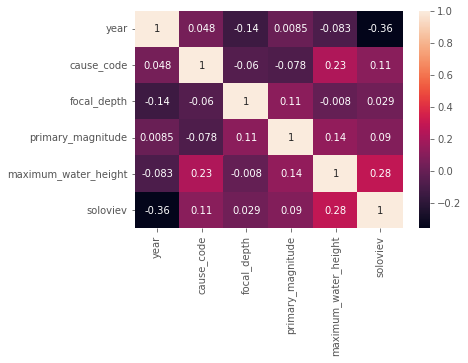

In [171]:
# Heatmap between Variables

sns.heatmap(df_corr, annot=True)

##**Data Visualization**

In [172]:
# Geo Plotting Tsunami Locations using Folium

map1 = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=2)

for idx, row in df.iterrows():
    Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(map1)

map1

In [173]:
# Plotting using clusters

map2 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=2)

mc = MarkerCluster()
for idx, row in df.iterrows():
    mc.add_child(Marker([row['latitude'], row['longitude']]))

map2.add_child(mc)
map2

In [174]:
# Heatmap of Tsunami Locations

map3 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=2)

HeatMap(data=df[['latitude', 'longitude']], radius=10).add_to(map3)

map3

In [175]:
# del map

In [176]:
sns.dark_palette("#69d", reverse=True, as_cmap=True)

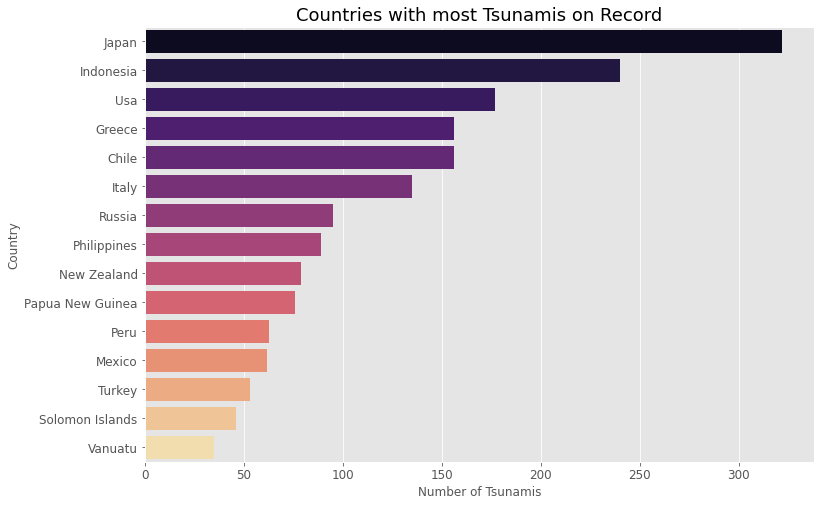

In [177]:
# Plotting the Countries with most Tsunamis on Record 

plt.figure(figsize=(12,8))
countries = list(map(lambda x: x.title(), df["country"].value_counts().keys().tolist()))
ax = sns.countplot(y="country", data=df, palette="magma", order=df["country"].value_counts().head(15).index)
ax.set_xscale("linear")
ax.axes.set_title("Countries with most Tsunamis on Record",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=12)
ax.set_ylabel("Country",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.show()

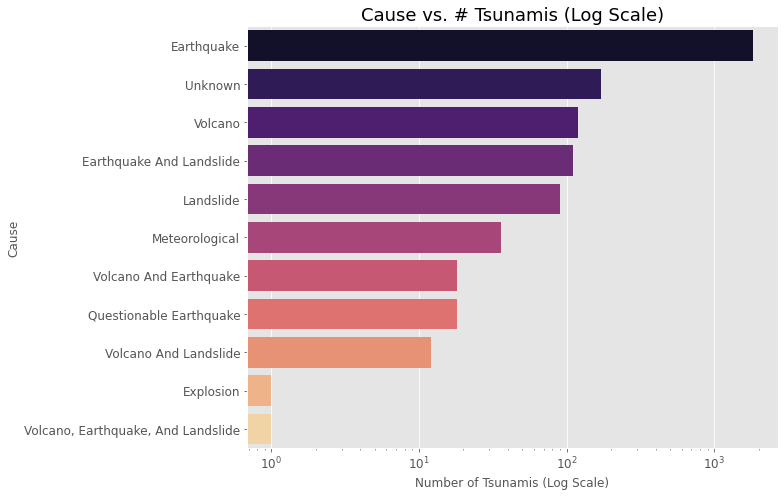

In [178]:
plt.figure(figsize=(11,7))
sns.color_palette("crest", as_cmap=True)
tsunami_cause = list(map(lambda x: x.title(), df["tsunami_cause"].value_counts().keys().tolist()))
ax = sns.countplot(y="tsunami_cause", data=df, palette="magma", order=df["tsunami_cause"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Cause vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=12)
ax.set_ylabel("Cause",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_yticklabels(cause, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


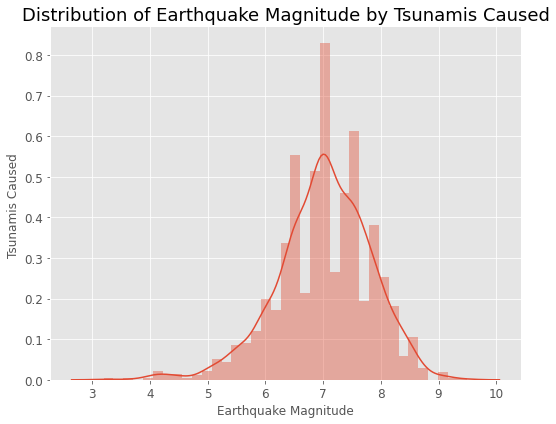

In [179]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df["primary_magnitude"], kde=True)
ax.axes.set_title("Distribution of Earthquake Magnitude by Tsunamis Caused",fontsize=18)
ax.set_xlabel("Earthquake Magnitude",fontsize=12)
ax.set_ylabel("Tsunamis Caused ",fontsize=12)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##**Data Querying and Insights**


###1. Countries with highest tsunami water height on average

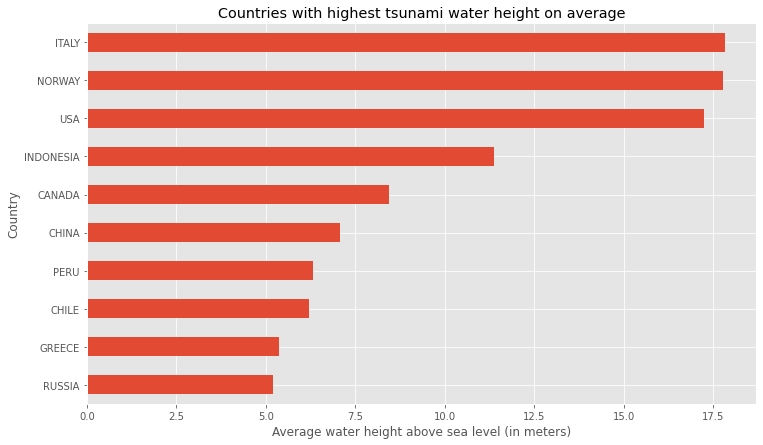

In [181]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['maximum_water_height'] \
    .agg(['mean','count']) \
    .query('count > 10') \
    .sort_values('mean', ascending=False)['mean'].head(10) \
    .plot(kind='barh', figsize=(12,7), title='Countries with highest tsunami water height on average')
ax.invert_yaxis()
ax.set_xlabel('Average water height above sea level (in meters)')  
ax.set_ylabel('Country')
plt.show()

###2. Countries with deadliest tsunamis on average


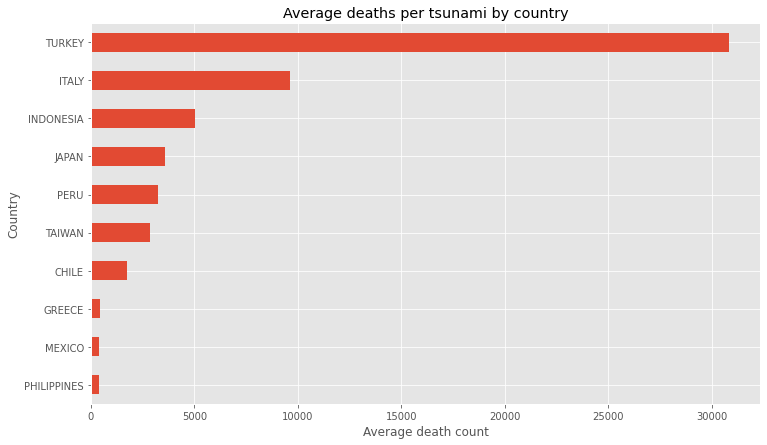

In [182]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['total_deaths'] \
    .agg(['mean','count']) \
    .query('count > 10') \
    .sort_values('mean',ascending=False)['mean'].head(10) \
    .plot(kind='barh', figsize=(12,7), title='Average deaths per tsunami by country')
ax.invert_yaxis()
ax.set_xlabel('Average death count')  
ax.set_ylabel('Country')
plt.show()

###3. Years with Biggest Damages caused by Tsunamis (in Millions of Dollars)

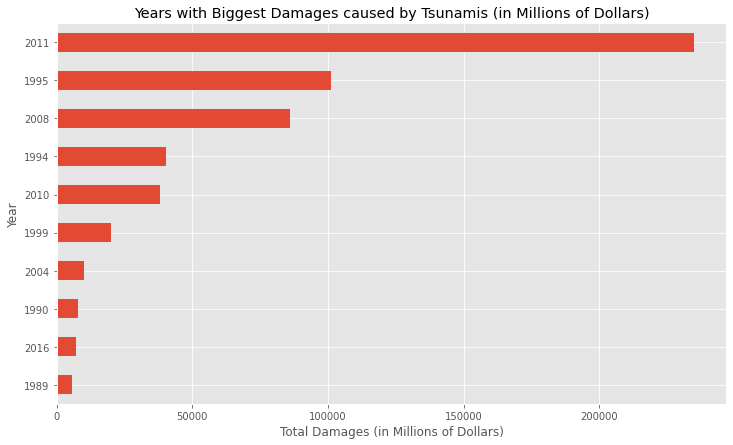

In [183]:
ax = df.query('location_name != "NA"') \
    .groupby('year')['total_damage_in_millions_dollars'] \
    .agg(['sum','count']) \
    .sort_values('sum',ascending=False)['sum'].head(10) \
    .plot(kind='barh', figsize=(12,7), title='Years with Biggest Damages caused by Tsunamis (in Millions of Dollars)')
ax.invert_yaxis()
ax.set_xlabel('Total Damages (in Millions of Dollars)')  
ax.set_ylabel('Year')
plt.show()

###4. Maximum Tsunami Intensity per Country

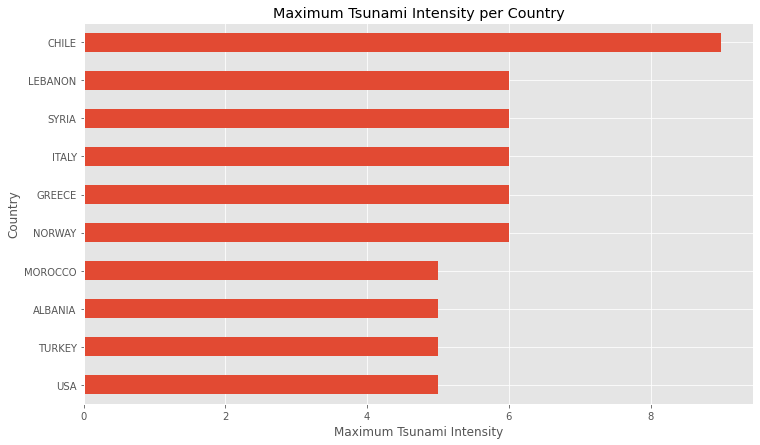

In [184]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['soloviev'] \
    .agg(['max']) \
    .sort_values('max',ascending=False)['max'].head(10) \
    .plot(kind='barh', figsize=(12,7), title='Maximum Tsunami Intensity per Country')
ax.invert_yaxis()
ax.set_xlabel('Maximum Tsunami Intensity')  
ax.set_ylabel('Country')
plt.show()

###5. Years with Most Tsunamis on Record

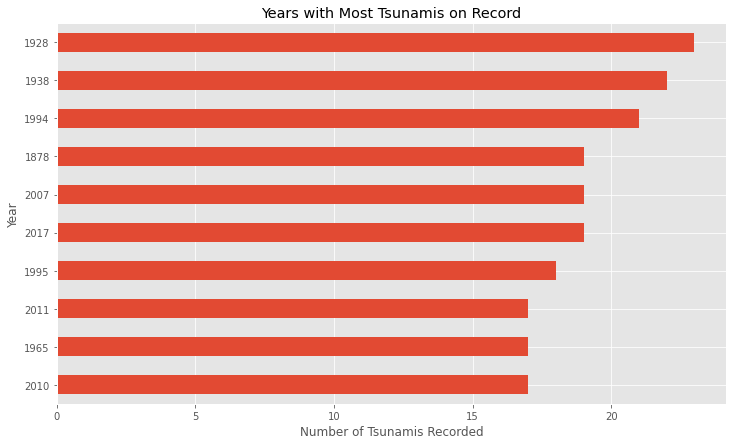

In [185]:
ax = df.query('location_name != "NA"') \
    .groupby('year')['tsunami_id'] \
    .agg(['count']) \
    .sort_values('count',ascending=False)['count'].head(10) \
    .plot(kind='barh', figsize=(12,7), title='Years with Most Tsunamis on Record')
ax.invert_yaxis()
ax.set_xlabel('Number of Tsunamis Recorded')  
ax.set_ylabel('Year')
plt.show()

In [186]:
df.to_csv('tsunami.csv', index=False)